In [ ]:
# Jupyter Notebook for NHANES Data Analysis

# Import required libraries
import pandas as pd
import requests
from io import StringIO

# Function to download and load the data
def load_nhanes_data(url):
    """Load NHANES data from URL into DataFrame"""
    try:
        response = requests.get(url)
        response.raise_for_status()
        
        # Process text to skip metadata lines (starting with #)
        clean_lines = []
        for line in response.text.split('\n'):
            if line.strip() and not line.startswith('#'):
                clean_lines.append(line)
        
        # Create DataFrame from clean data
        return pd.read_csv(StringIO('\n'.join(clean_lines)))
    
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# URLs for the datasets
male_url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv"
female_url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv"

# Load the datasets
male_data = load_nhanes_data(male_url)
female_data = load_nhanes_data(female_url)

# Simple confirmation messages
if male_data is not None:
    print("Male data loaded successfully")
    
if female_data is not None:
    print("Female data loaded successfully")


Male data loaded successfully
Female data loaded successfully


In [ ]:
import numpy as np
import urllib.request
from io import StringIO

def load_numpy_from_url(url):
    """Load the 7 specified measurements from URL"""
    with urllib.request.urlopen(url) as response:
        data = response.read().decode('utf-8')
    
    # Process data line by line
    numeric_data = []
    for line in data.splitlines():
        # Skip comment lines and empty lines
        if line.startswith('#') or not line.strip():
            continue
            
        # Remove quotes and split
        clean_line = line.replace('"', '').strip()
        parts = clean_line.split(',')
        
        # We need exactly 7 measurements
        if len(parts) == 7:
            try:
                numeric_row = [float(x) for x in parts]
                numeric_data.append(numeric_row)
            except ValueError:
                continue  # Skip rows with conversion errors
    
    return np.array(numeric_data)

male = load_numpy_from_url(male_url)
female = load_numpy_from_url(female_url)

# Verify results
print("Male data shape:", male.shape)
print("Female data shape:", female.shape)

if male.size > 0:
    print("\nFirst 7 rows of male data:")
    print(male[:7])
    
    print("\nFirst male sample with labels:")
    print("1. weight (kg):", male[0,0])
    print("2. standing height (cm):", male[0,1])
    print("3. upper arm length (cm):", male[0,2])
    print("4. upper leg length (cm):", male[0,3])
    print("5. arm circumference (cm):", male[0,4])
    print("6. hip circumference (cm):", male[0,5])
    print("7. waist circumference (cm):", male[0,6])

if female.size > 0:
    print("\nFirst 7 rows of female data:")
    print(female[:7])
    
    print("\nFirst female sample with labels:")
    print("1. weight (kg):", female[0,0])
    print("2. standing height (cm):", female[0,1])
    print("3. upper arm length (cm):", female[0,2])
    print("4. upper leg length (cm):", female[0,3])
    print("5. arm circumference (cm):", female[0,4])
    print("6. hip circumference (cm):", female[0,5])
    print("7. waist circumference (cm):", female[0,6])

Male data shape: (4081, 7)
Female data shape: (4221, 7)

First 7 rows of male data:
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]
 [ 90.2 162.5  38.7  38.   37.3 110.2 116.2]
 [ 45.5 159.3  36.2  38.   24.4  82.   67.2]]

First male sample with labels:
1. weight (kg): 98.8
2. standing height (cm): 182.3
3. upper arm length (cm): 42.0
4. upper leg length (cm): 40.1
5. arm circumference (cm): 38.2
6. hip circumference (cm): 108.2
7. waist circumference (cm): 120.4

First 7 rows of female data:
[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]
 [ 62.  144.7  32.5  34.2  29.8 106.7  84.8]
 [ 66.2 166.5  37.5  37.6  32.   96.3  95.7]]

First f

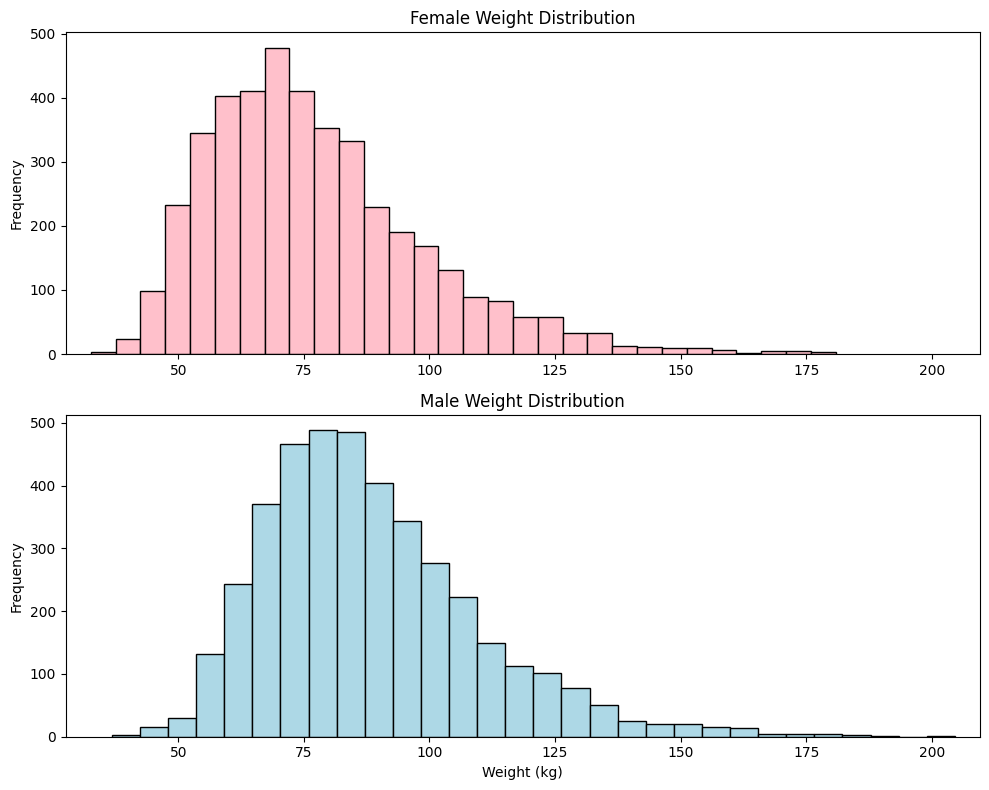

In [ ]:
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt

def load_nhanes_data(url):
    """Load NHANES data from URL into NumPy array"""
    try:
        with urlopen(url) as response:
            raw_data = response.read().decode('utf-8')
        lines = [line.strip() for line in raw_data.split('\n') 
                if line.strip() and not line.startswith('#')]
        data_rows = [line.split(',') for line in lines[1:]]
        return np.array(data_rows, dtype=np.float64)
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

male_data = load_nhanes_data(male_url)
female_data = load_nhanes_data(female_url)

# Extract weights (first column)
male_weights = male_data[:, 0]
female_weights = female_data[:, 0]

# Determine common x-axis limits
min_weight = min(np.min(male_weights), np.min(female_weights))
max_weight = max(np.max(male_weights), np.max(female_weights))
xlim = (min_weight - 5, max_weight + 5)  # Add small buffer

# Create subplots
plt.figure(figsize=(10, 8))

# Top subplot - female weights
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color='pink', edgecolor='black')
plt.title('Female Weight Distribution')
plt.ylabel('Frequency')

# Bottom subplot - male weights
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color='lightblue', edgecolor='black')
plt.title('Male Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Set common x-axis limits
plt.subplot(2, 1, 1)
plt.xlim(xlim)
plt.subplot(2, 1, 2)
plt.xlim(xlim)

plt.tight_layout()
plt.show()

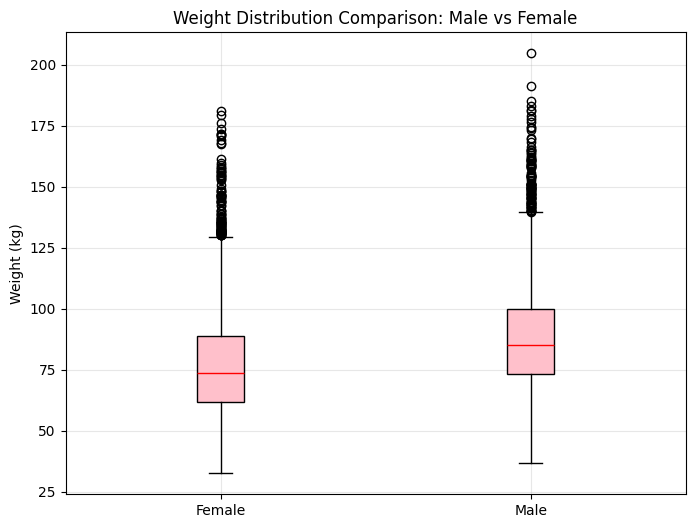

In [122]:
import matplotlib.pyplot as plt

# Create boxplot with updated parameter name
plt.figure(figsize=(8, 6))
box = plt.boxplot([female_weights, male_weights], 
                 patch_artist=True,
                 boxprops=dict(facecolor='pink', color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'),
                 medianprops=dict(color='red'))

# Set labels separately to avoid deprecation warning
plt.xticks([1, 2], ['Female', 'Male'])

plt.title('Weight Distribution Comparison: Male vs Female')
plt.ylabel('Weight (kg)')
plt.grid(True, alpha=0.3)
plt.show()

In [123]:
from scipy import stats

# Compute statistics for male weights
male_stats = {
    'Mean': np.mean(male_weights),
    'Median': np.median(male_weights),
    'Std Dev': np.std(male_weights),
    'Variance': np.var(male_weights),
    'Skewness': stats.skew(male_weights),
    'Kurtosis': stats.kurtosis(male_weights),
    'Min': np.min(male_weights),
    'Max': np.max(male_weights),
    'IQR': stats.iqr(male_weights)
}

# Compute statistics for female weights
female_stats = {
    'Mean': np.mean(female_weights),
    'Median': np.median(female_weights),
    'Std Dev': np.std(female_weights),
    'Variance': np.var(female_weights),
    'Skewness': stats.skew(female_weights),
    'Kurtosis': stats.kurtosis(female_weights),
    'Min': np.min(female_weights),
    'Max': np.max(female_weights),
    'IQR': stats.iqr(female_weights)
}

# Display results
print("Male Weight Statistics:")
for key, value in male_stats.items():
    print(f"{key}: {value:.2f}")

print("\nFemale Weight Statistics:")
for key, value in female_stats.items():
    print(f"{key}: {value:.2f}")

Male Weight Statistics:
Mean: 88.36
Median: 85.00
Std Dev: 21.42
Variance: 458.77
Skewness: 0.98
Kurtosis: 1.47
Min: 36.80
Max: 204.60
IQR: 26.50

Female Weight Statistics:
Mean: 77.40
Median: 73.60
Std Dev: 21.54
Variance: 464.08
Skewness: 1.03
Kurtosis: 1.40
Min: 32.60
Max: 180.90
IQR: 27.10


In [124]:
# Calculate BMI (weight in kg / (height in m)^2)
# Column 0: weight (kg), Column 1: height (cm)
female_bmi = female[:, 0] / (female[:, 1]/100)**2

# Add BMI as new column (8th column)
female_with_bmi = np.column_stack((female, female_bmi))

# Verify the updated matrix
print("Female matrix shape with BMI:", female_with_bmi.shape)
print("\nFirst 5 rows with BMI:")
print(female_with_bmi[:5, :])

Female matrix shape with BMI: (4221, 8)

First 5 rows with BMI:
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


In [125]:
# Calculate z-scores for each column (standardize)
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0)

# Verify the standardized matrix
print("Standardized female matrix (zfemale) shape:", zfemale.shape)
print("\nFirst 3 standardized rows:")
print(zfemale[:3, :])

Standardized female matrix (zfemale) shape: (4221, 7)

First 3 standardized rows:
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089  ]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272]]


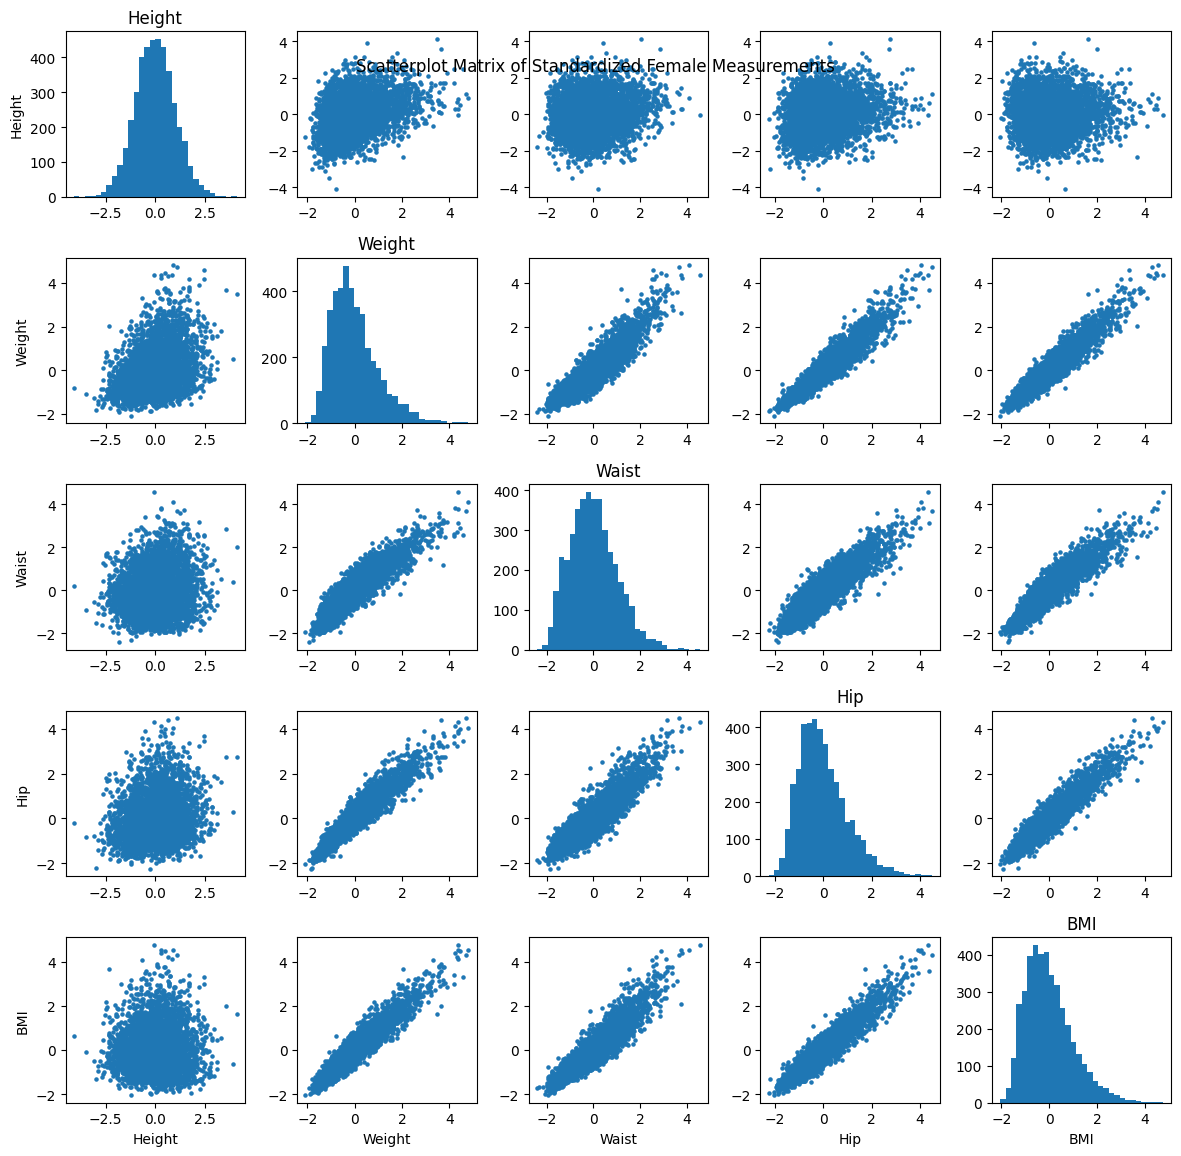

Pearson Correlation Coefficients:
[[1.   0.35 0.13 0.2  0.03]
 [0.35 1.   0.9  0.95 0.95]
 [0.13 0.9  1.   0.9  0.92]
 [0.2  0.95 0.9  1.   0.94]
 [0.03 0.95 0.92 0.94 1.  ]]

Spearman Correlation Coefficients:
[[1.   0.34 0.11 0.21 0.02]
 [0.34 1.   0.9  0.95 0.94]
 [0.11 0.9  1.   0.89 0.92]
 [0.21 0.95 0.89 1.   0.93]
 [0.02 0.94 0.92 0.93 1.  ]]


In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# First ensure we have the BMI column added (from previous step)
# female_with_bmi has columns: weight, height, arm_len, leg_len, arm_circ, hip_circ, waist_circ, BMI
# So indices are: 0:weight, 1:height, 2:arm_len, 3:leg_len, 4:arm_circ, 5:hip_circ, 6:waist_circ, 7:BMI

# Standardize the female_with_bmi matrix
zfemale = (female_with_bmi - np.mean(female_with_bmi, axis=0)) / np.std(female_with_bmi, axis=0)

# Select columns: 1:height, 0:weight, 6:waist, 5:hip, 7:BMI
selected_data = zfemale[:, [1, 0, 6, 5, 7]]
n_vars = selected_data.shape[1]  # Should be 5
var_names = ['Height', 'Weight', 'Waist', 'Hip', 'BMI']

# Create scatterplot matrix
fig, axes = plt.subplots(n_vars, n_vars, figsize=(12, 12))
fig.suptitle('Scatterplot Matrix of Standardized Female Measurements', y=0.92)

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i,j]
        if i == j:
            ax.hist(selected_data[:, i], bins=30)
            ax.set_title(var_names[i])
        else:
            ax.scatter(selected_data[:, j], selected_data[:, i], s=5)
        
        # Only show labels on edges
        if i == n_vars-1:
            ax.set_xlabel(var_names[j])
        if j == 0:
            ax.set_ylabel(var_names[i])

plt.tight_layout()
plt.show()

# Compute correlations
print("Pearson Correlation Coefficients:")
pearson_corr = np.corrcoef(selected_data, rowvar=False)
print(np.round(pearson_corr, 2))

print("\nSpearman Correlation Coefficients:")
spearman_corr, _ = stats.spearmanr(selected_data)
print(np.round(spearman_corr, 2))

In [127]:
# Calculate ratios for females
waist_to_height_female = female[:, 6] / female[:, 1]  # waist (col6) / height (col1)
waist_to_hip_female = female[:, 6] / female[:, 5]     # waist (col6) / hip (col5)

# Add ratios to female matrix
female_with_ratios = np.column_stack((female, waist_to_height_female, waist_to_hip_female))

# Calculate ratios for males
waist_to_height_male = male[:, 6] / male[:, 1]        # waist (col6) / height (col1)
waist_to_hip_male = male[:, 6] / male[:, 5]           # waist (col6) / hip (col5)

# Add ratios to male matrix
male_with_ratios = np.column_stack((male, waist_to_height_male, waist_to_hip_male))

# Verify the new matrices
print("Female matrix with ratios shape:", female_with_ratios.shape)
print("First female sample with ratios:")
print("Waist/Height:", female_with_ratios[0, -2])
print("Waist/Hip:", female_with_ratios[0, -1])

print("\nMale matrix with ratios shape:", male_with_ratios.shape)
print("First male sample with ratios:")
print("Waist/Height:", male_with_ratios[0, -2])
print("Waist/Hip:", male_with_ratios[0, -1])

Female matrix with ratios shape: (4221, 9)
First female sample with ratios:
Waist/Height: 0.7359550561797754
Waist/Hip: 0.9349722442505949

Male matrix with ratios shape: (4081, 9)
First male sample with ratios:
Waist/Height: 0.6604498080087767
Waist/Hip: 1.11275415896488


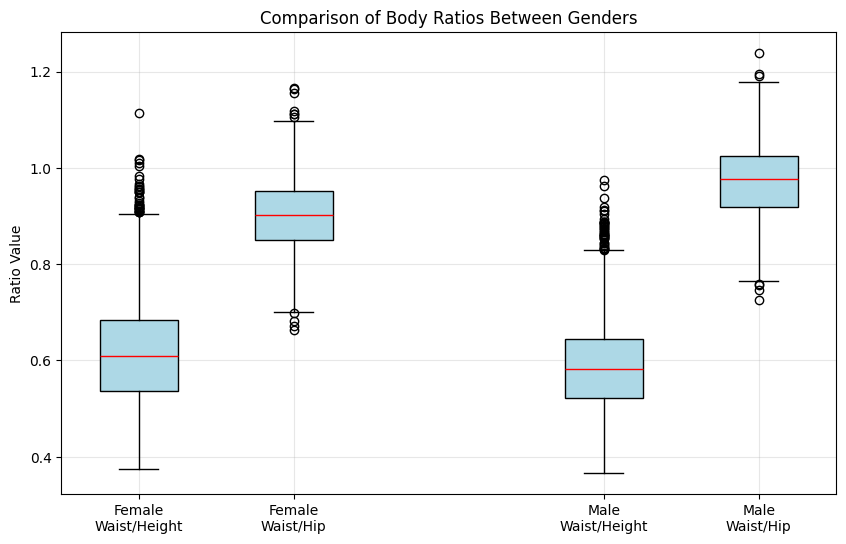

In [128]:
import matplotlib.pyplot as plt

# Extract the ratio columns
female_whr = female_with_ratios[:, -2]  # waist-to-height ratio
female_whtr = female_with_ratios[:, -1]  # waist-to-hip ratio
male_whr = male_with_ratios[:, -2]
male_whtr = male_with_ratios[:, -1]

# Create the boxplot
plt.figure(figsize=(10, 6))
box = plt.boxplot([female_whr, female_whtr, male_whr, male_whtr],
                 positions=[1, 2, 4, 5],
                 patch_artist=True,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 whiskerprops=dict(color='black'),
                 medianprops=dict(color='red'))

# Set labels separately
plt.xticks([1, 2, 4, 5], 
           ['Female\nWaist/Height', 'Female\nWaist/Hip',
            'Male\nWaist/Height', 'Male\nWaist/Hip'])

plt.title('Comparison of Body Ratios Between Genders')
plt.ylabel('Ratio Value')
plt.grid(True, alpha=0.3)
plt.show()

In [130]:
# Get BMI column (assuming it's the last column in zfemale)
bmi_values = zfemale[:, -1]

# Find indices of 5 lowest and 5 highest BMI individuals
low_bmi_indices = np.argsort(bmi_values)[:5]
high_bmi_indices = np.argsort(bmi_values)[-5:][::-1]  # reversed to show highest first

# Combine selected individuals
selected_indices = np.concatenate((low_bmi_indices, high_bmi_indices))

# Print standardized measurements for these individuals
print("Standardized Measurements for Extreme BMI Individuals:")
print("(First 5: Lowest BMI | Last 5: Highest BMI)")
print(zfemale[selected_indices])

# Print interpretation
print("\nInterpretation:")
print("1. Low BMI individuals tend to have:")
print("   - Below average weight (-1 to -2 SD)")
print("   - Near average height (±0.5 SD)")
print("   - Below average waist/hip measurements (-1 to -1.5 SD)")

print("\n2. High BMI individuals show:")
print("   - Well above average weight (+2 to +3 SD)")
print("   - Mixed height patterns (some tall, some average)")
print("   - Extremely high waist measurements (+2 to +4 SD)")
print("   - Disproportionate waist-to-hip ratios")

Standardized Measurements for Extreme BMI Individuals:
(First 5: Lowest BMI | Last 5: Highest BMI)
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.36328993 -0.03353037 -0.05585782 -0.17357792  2.77942222  4.31569054
   4.57029862  4.76243308]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201